# Empalme con la clase anterior.
En la clase anterior estudiamos la ecuacion de onda en una dimension y encontramos el siguiente critierio de estabilidad para el algortimo de Crank-Nicholson:

$$ c \le \frac{\Delta x}{\Delta t}$$
Fisica y numericamente esto indica que la velocidad de propagacion de onda $c$ debe ser que menor que la velocidad en la malla $\Delta x/\Delta t$. Si se quiere
incrementar la velocidad en la malla se debe acortar $\Delta t$.  Al numero
$$\frac{c \Delta t}{\Delta x} $$
se le conoce con el nombre de numero de CFL en honor
a Courant, Friedrichs y Lewy que lo descubrieron.


 Desde el punto de vista de programacion es mejor preguntar

$$\Delta t \le \frac{\Delta x}{x} $$

## Metodos para verificar codigo.


# metodos de prueba para codigo
* probar con soluciones ya conocidas. (ya)
* inventar una solucion (al final de la case)


Resolver:
$$u_{xx} - \frac{1}{c^2} u_{tt} = - g(x,t) $$
condiciones iniciales
$$u(x,t_0)=p(x) \quad u_t(x, t_0) = q(x) $$
condiciones de frontera
$$ u(a,t)=e(t) \quad \quad u(b,t)= f(t)$$
En este problema

$$ p(x) = 6 \sin \frac{\pi x}{L} $$

La solucion analitica es (por ahora fuente 0)
$$u(x,t) = 6 \sin \frac{\pi x }{L} \cos \frac{ \pi c t}{L} $$
$L=b-a$, $a=0$, $t_0=0$, $c=1$

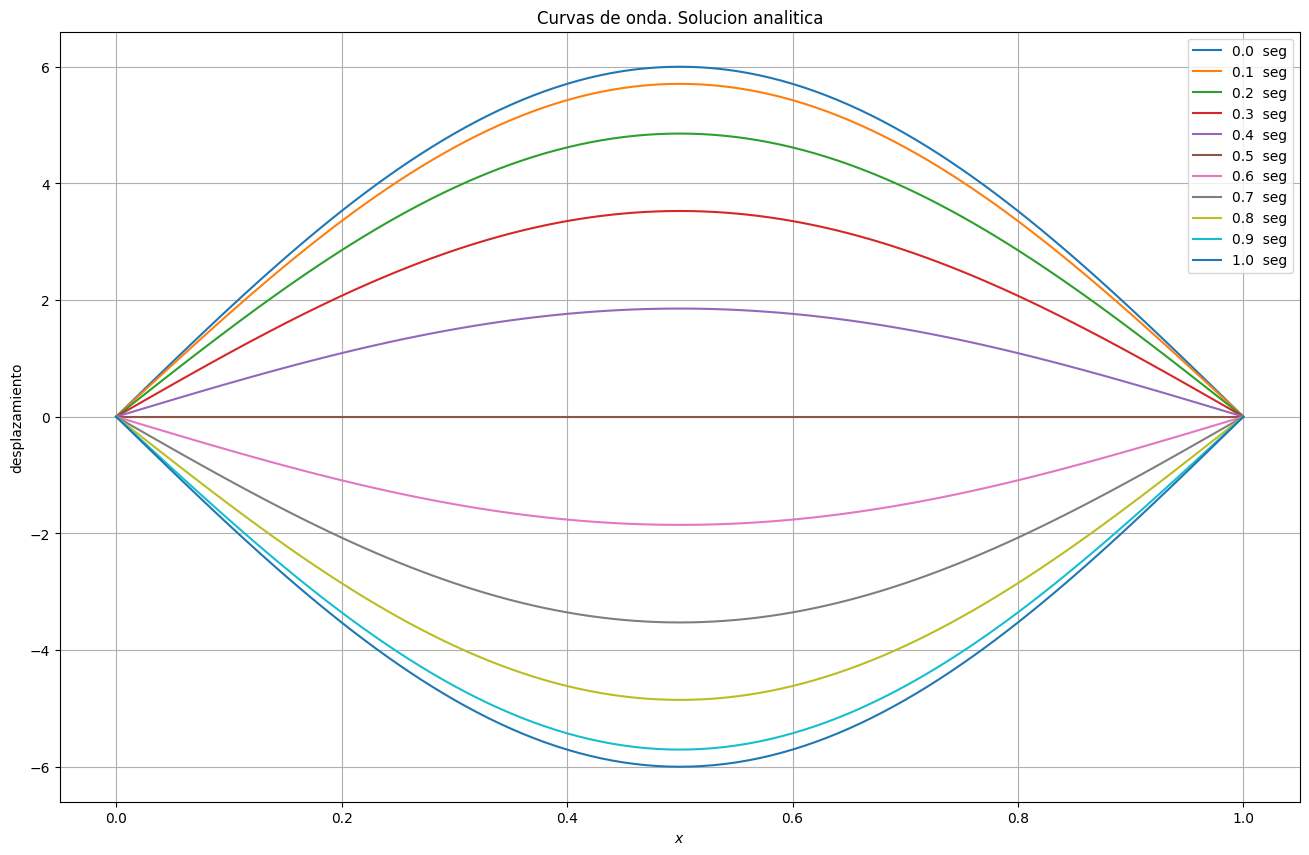

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
from numpy import pi, sin, cos, array
from matplotlib.pyplot import figure

figure(figsize=(16,10))

# grafica de solucion analitica
# definicion de parametros
a=0
b=1
t0=0
L=b-a
c=1
nx=101
dt=0.1

def u(x,t):
    return 6*sin(pi*x/L)*cos(pi*c*t/L)

# graficar
params={"legend.fontsize":5, "legend.handlength":1}

Ndt =11 # numero de graficas

plt.xlabel(r"$x$")
plt.ylabel("desplazamiento")
plt.title("Curvas de onda. Solucion analitica")

X=np.linspace(a,b,nx)
for j in range(Ndt):
    t = j*dt
    plt.plot(X, u(X,t), label=str(round(t,1)) + '  seg')

plt.grid()
plt.legend()
plt.show()









In [4]:
# implementacion del algoritmo
def solve_waveeq(c, a, b, t0, nt, nx, dt, e, f, p, q, g):
    X = np.linspace(a,b,nx)
    cmax = max(c(xx) for xx in X)

    L=b-a
    dx=L/(nx-1)
    gamma=cmax*dt/dx
    stab_cond=dx/cmax

    # test stability
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada. Reduzca dt")
        # return None

    tmax=nt*dt
    t=np.arange(t0,tmax,dt)

    w=np.zeros((nx,nt),dtype=float)
    print("dimensions of w", w.shape)

    # condiciones iniciales
    for i in range(1,nx-1):
        w[i,0]=p(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = e(t[j])
        w[nx-1, j]=f(t[j])

    # lleno de capa 1
    for i in range(1, nx-1):
        gamma = c(X[i]) * dt / dx
        w[i,1] = (0.5*gamma**2*p(X[i-1]) + (1.0-gamma**2)*p(X[i]) +
                  0.5*gamma**2*p(X[i+1]) + q(X[i])*dt
                  + 0.5*c(X[i])**2**dt**2*g(X[i], t0))

        # como ya se tienen dos capas se puede iterar en tiempo
    for j in range(1, nt-1):
        for i in range(1, nx-1):
            gamma = c(X[i]) * dt / dx
            w[i, j+1] = (gamma**2 * w[i-1, j] + 2.0*(1.-gamma**2) * w[i, j] +
                          gamma**2 * w[i+1, j] - w[i,j-1]
                          + g(X[i], t[j])*c(X[i])**2*dt**2)

    return w

In [5]:
# prueba numerica
def v(x):
    return 1

def e(t):
    return 0

def f(t):
    return 0

def p(x):
    return 6*sin(pi*x/L)

def q(x):
    return 0

def g(x,t):
    return 0

dt=0.001
nt=1001

w = solve_waveeq(v, a, b, t0, nt, nx, dt, e,f,p,q,g)

dimensions of w (101, 1001)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

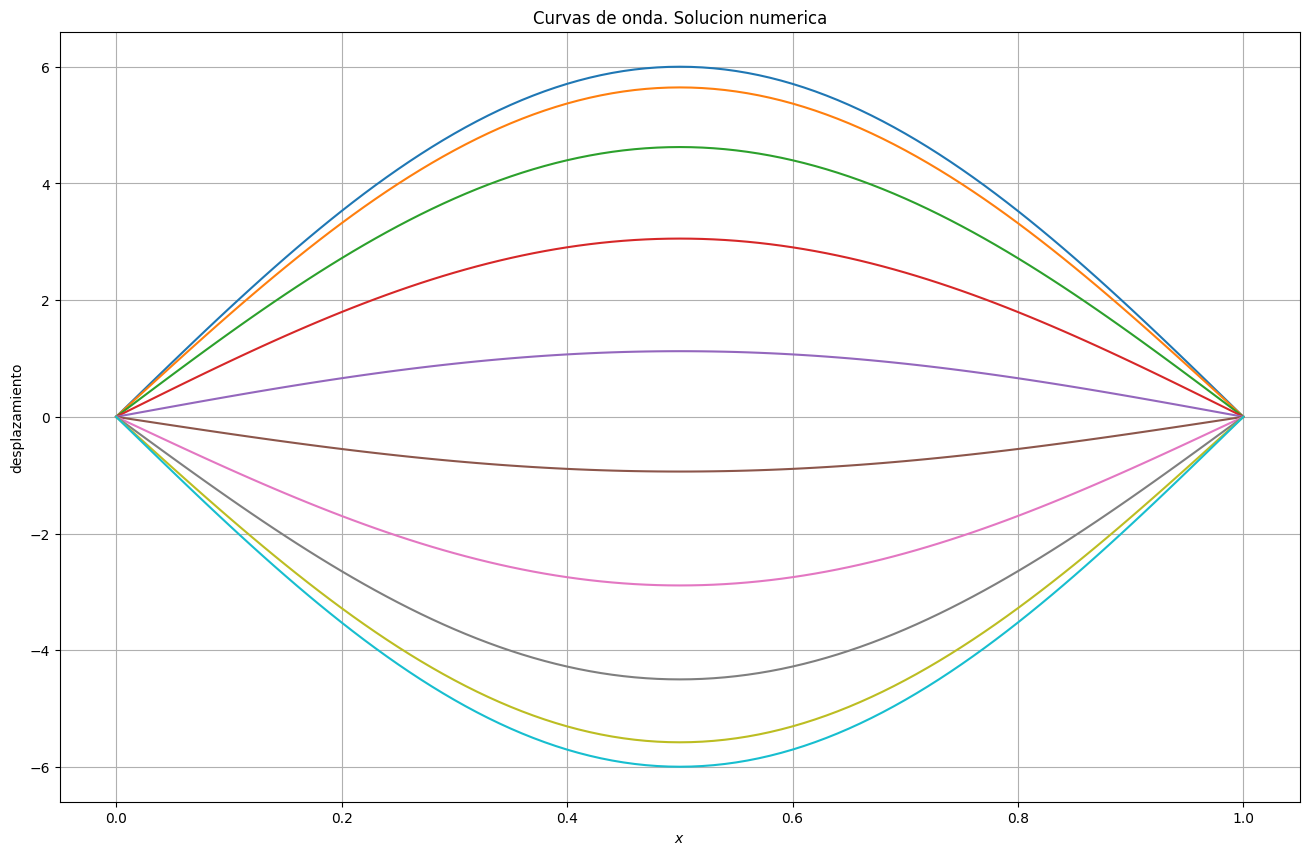

In [6]:
# graficamos la solucion
params={"legend.fontsize":5, "legend.handlength":1}
figure(figsize=(16,10))

Ndt =110 # salto

plt.xlabel(r"$x$")
plt.ylabel("desplazamiento")
plt.title("Curvas de onda. Solucion numerica")

X=np.linspace(a,b,nx)
for j in range(0,nt,Ndt):
    t = j*dt
    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')

plt.grid()
plt

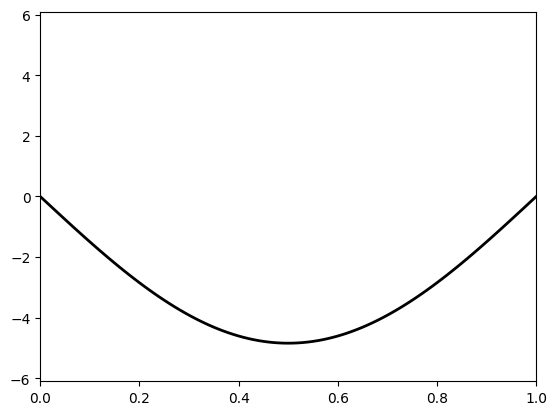

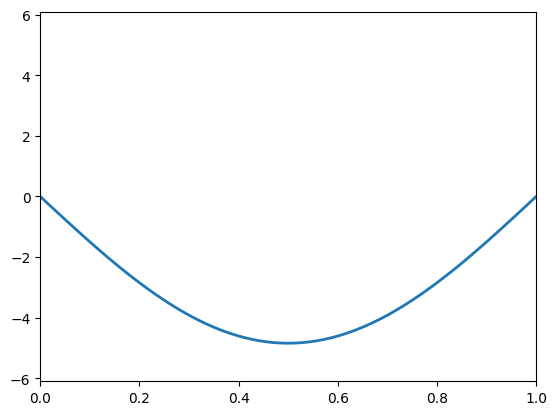

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming w[i,j] is your wavefield, where i=0,...,100 (space) and j=0,...,1000 (time)
# For demonstration, we'll create a dummy wavefield.
# You should replace this with your actual data.
X=np.linspace(a,b,w.shape[0])

# Create a dummy wavefield: a traveling sine wave
# w = np.sin(2 * np.pi * (x[:, None] - t / 5))  # shape (i_max, j_max)

# Create the figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Set the limits of the plot
ax.set_xlim(0, 1)  # x-axis corresponds to space
ax.set_ylim(-6.1, 6.1)  # y-axis corresponds to wave amplitude

# Function to initialize the animation
def init():
    line.set_data([], [])
    return line,

# Function to update the animation for each frame (time step j)
def update(j):
    line.set_data(X, w[:, j])  # Update the wave for time j
    return line,

j_max=800
# Create the animation
ani = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True, interval=20)
ani.save('waveimg.gif', writer='pillow')

# Display the animation
plt.show()


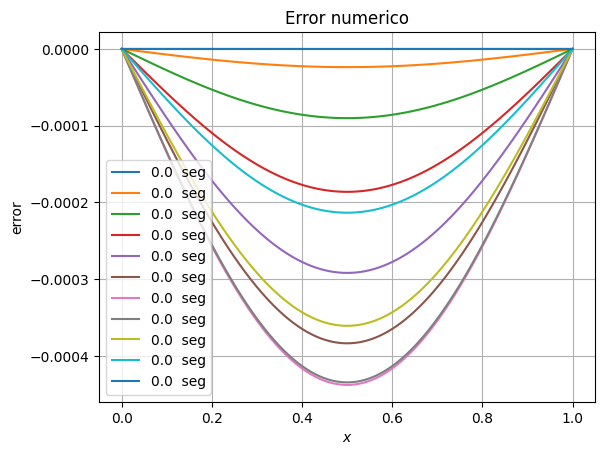

In [10]:
# calculo de error
nt=1001
dt=0.001
Nt=11
dx=(b-a)/(nx-1)
error=np.zeros((nx,Nt+1))
skip=100

k=0
for j in range(0, nt, skip):
    t = j*dt
    for i in range(nx):
        error[i,k]=-(w[i,j]-u(X[i],t))
    k+=1

# graficar el error
params={"legend.fontsize":5, "legend.handlength":1}

plt.xlabel(r"$x$")
plt.ylabel("error")
plt.title("Error numerico")

X = np.linspace(a,b,nx)
for j in range(Nt):
    t=j*dt
    plt.plot(X, error[:,j], label=str(round(t,1)) + '  seg')
    plt.legend()
    plt.grid()
plt.show()


In [11]:
# ejemplo de intestabilidad
dt=0.1
nt=11
w=solve_waveeq(v, a, b, t0, nt, nx, dt, e,f,p,q,g)

error: la condicion de estabilidad fue violada. Reduzca dt
dimensions of w (101, 11)


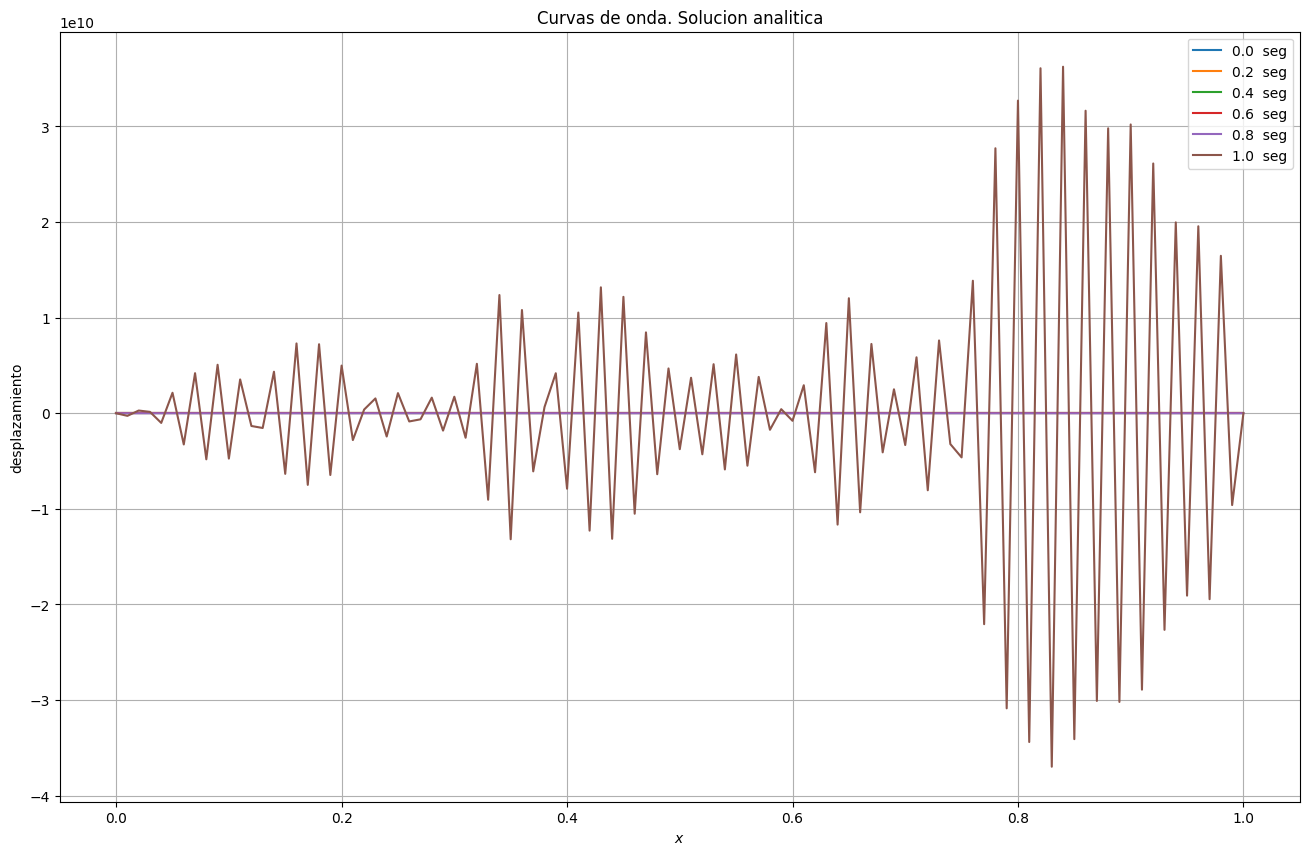

In [15]:
# graficar
params={"legend.fontsize":5, "legend.handlength":1}

Ndt=2
figure(figsize=(16,10))

plt.xlabel(r"$x$")
plt.ylabel("desplazamiento")
plt.title("Curvas de onda. Solucion analitica")

X=np.linspace(a,b,nx)
for j in range(0,nt,Ndt):
    t = j*dt
    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')

plt.grid()
plt.legend()
plt.show()


# condicion inicial gaussiana
$$p(x)= \mathrm{e}^{-400(x - 0.5)^2} $$


In [16]:
def p(x):
    return np.exp(-400*(x-0.5)**2)

def q(x):
    return 0

def g(x,t):
    return 0

In [17]:
# parametros
dt = 0.001
nt=1001
nx=501
a=0
b=1
t0=0

w=solve_waveeq(v, a, b, t0, nt, nx, dt, e,f,p,q,g)

dimensions of w (501, 1001)


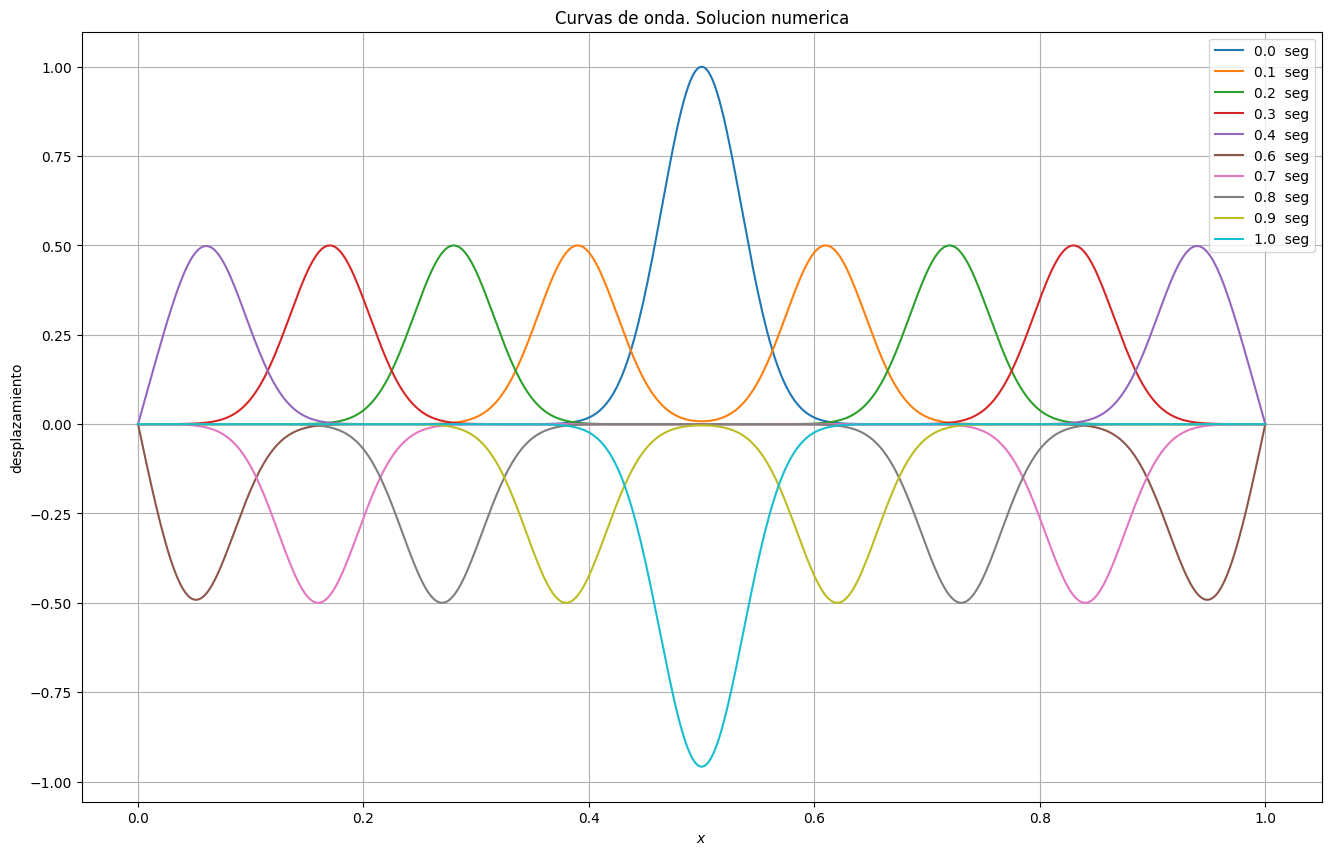

In [20]:
# grafica
params={"legend.fontsize":5, "legend.handlength":1}
figure(figsize=(16,10))

Ndt =110 # salto

plt.xlabel(r"$x$")
plt.ylabel("desplazamiento")
plt.title("Curvas de onda. Solucion numerica")

X=np.linspace(a,b,nx)
for j in range(0,nt,Ndt):
    t = j*dt
    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')

plt.grid()
plt.legend()
plt.show()

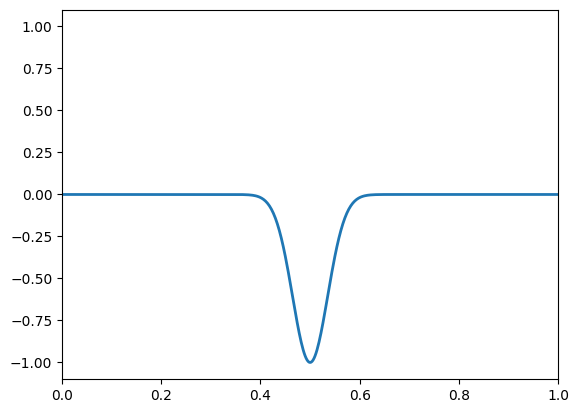

In [23]:
# animacion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

X =np.linspace(a,b,w.shape[0])

# figures
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# limits
ax.set_xlim(0, 1)  # x-axis corresponds to space
ax.set_ylim(-1.1, 1.1)  # y-axis corresponds

#initialize
def init():
    line.set_data([], [])
    return line,

# update
def update(j):
    line.set_data(X, w[:, j])  # Update the wave for time j
    return line,

# create animation
ani = FuncAnimation(fig, update, frames=nt, init_func=init, blit=True, interval=20)
ani.save('waveimg.gif', writer='pillow')

# Display the animation
ani.save("waveimg2.gif", writer='pillow')

plt.show()

## Segundo metodo para probar algoritmos


Inventamos una solucion que cumpla condiciones de frontera e iniciales deseadas (por facilidad 0), y buscamos la fuente $g(x,t)$ que me resuelva este problema.


$$u(x,t) = x(L-x) \sin t $$

Vamos a insertar esto en la ecuacion de onda

$$u_x = L \sin t - 2x \sin t $$
$$u_{xx} = - 2 \sin t \tag{1} $$
$$ u_t=x(L-x)  \cos t  $$
$$ u_{tt}=-x(L-x)  \sin t \tag{2} $$

La ecuacion de onda
$$u_{tt} - (1/c^2) u_{xx}= -g(x,t)  \tag{3}$$
Al insertar (1) y (2) en (3)

$$-x(L-x) \sin t - \frac{1}{c^2} (-2  \sin t) =-g(x,t) $$
O sea que

$$g(x,t) = 2 \sin t \left ( 1 - \frac{x(L-x)}{c^2} \right ) $$

$$u(x,0)=0 \quad , u_t(x,0)=0 $$